# Question 1

In [19]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [20]:
def mb(z,c):
    f = z**2 + c
    return z

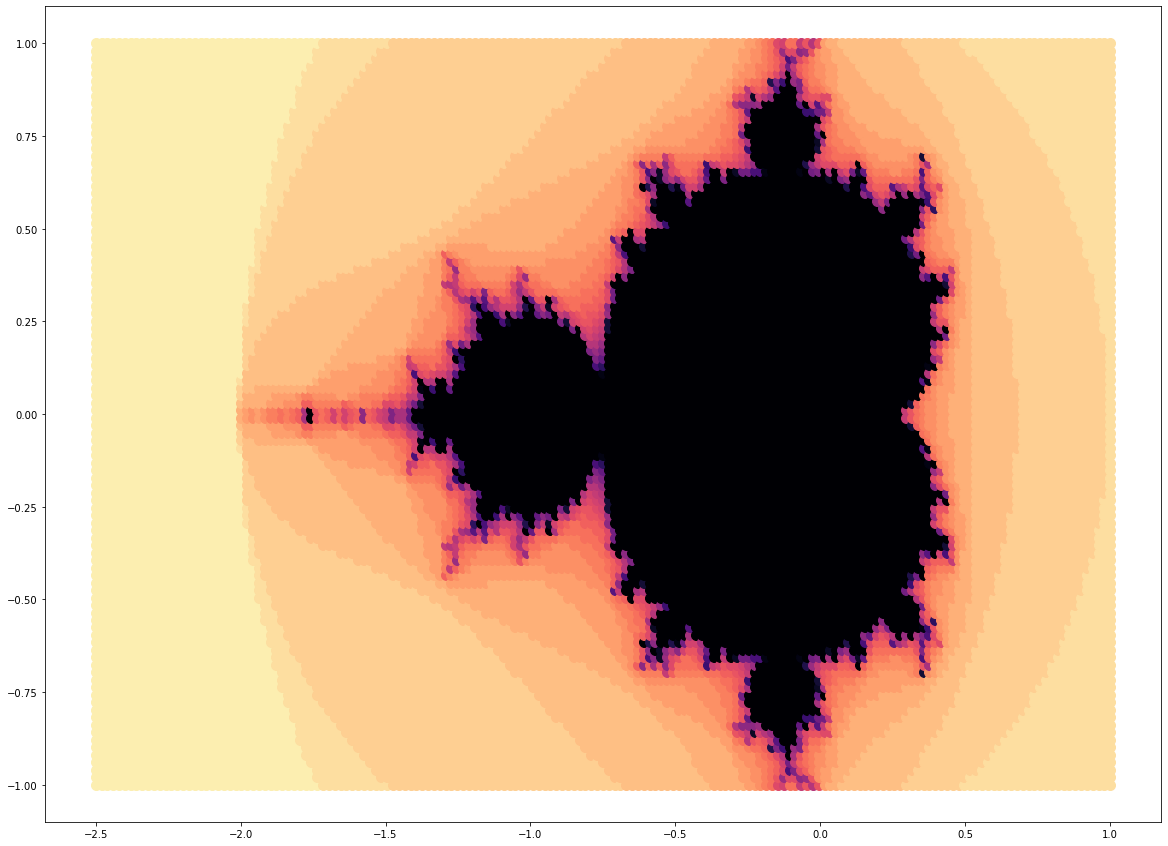

In [21]:
points=100
max_iteration = 30
colors = plt.cm.magma_r(np.linspace(0, 1, max_iteration+1))
fig=plt.figure(figsize=(20,15))

z = 0
xline = np.linspace(-2.5,1, int(points*1.75))
yline = np.linspace(-1,1, points)
index=0
for i in xline:
    for j in yline:
        x = 0.0
        y = 0.0
        iteration = 0
        while(x*x + y*y <= 2*2 and iteration < max_iteration):
            xtemp = x*x - y*y + i
            y = 2*x*y + j
            x = xtemp 
            iteration+=1
            
        #col = (iteration / max_iteration)        
        plt.scatter(i,j, color = colors[iteration], norm=mpl.colors.LogNorm(), s=100)   


# Question 2

In [22]:
#First, let's sample a random (x,y) coordinate pair:

def make_samples(N, xMin=-2, xMax=1, yMin=-1, yMax=1):
    ''' Returns an array of uniformly sampled N coordinates in a given range.
    '''
    x = np.random.uniform(xMin, xMax, N)
    y = np.random.uniform(yMin, yMax, N)
    samples = np.array([x, y])
    #Transpose, such that we can index on coordinate pairs easily
    return samples.T

In [23]:
def mandelbrot_area(i,j, max_iteration):
    ''' Determines if a given coordinate is in the mandelbrot set.
    It does this by checking if the corresponding irrational number tends to infinity in a given amount 
    of iterations.
    '''
    x = 0.0
    y = 0.0
    iteration = 0
    while(x*x + y*y <= 2*2 and iteration < max_iteration):
        xtemp = x*x - y*y + i
        y = 2*x*y + j
        x = xtemp 
        iteration+=1
    if (iteration == max_iteration):
        return True
    else:
        return False

In [24]:
def monte_carlo_area(sample_size, max_iterations, area):
    ''' Approximates the area of the mandelbrot set.
    The function generates samples and for each sample determines if it is in the mandelbrot set.
    The ratio of samples in the set can then be used to approximate its area.
    '''
    samples = make_samples(sample_size)
    ratio = []
    for i in samples:
        x = mandelbrot_area(i[0], i[1], max_iterations)
        ratio.append(x)

    # Uses a mask to determine the ratio of hits by Boolean indexing.
    ones = np.ones(sample_size)
    ones = ones[ratio]
    total = np.sum(ones)
    # Proportion of True to False, multiplied by area of the sampled square.
    mandel_area = (total/sample_size) * area
    return mandel_area


In [25]:
TOTAL_AREA = 3*2
S = 10000
MAX_ITERATIONS = 100

ar = monte_carlo_area(S, MAX_ITERATIONS, TOTAL_AREA)
print("So estimated Area of the Mandelbrot Island is: ", ar)



So estimated Area of the Mandelbrot Island is:  1.5804


In [26]:
#!!Adjusted
def iteration_convergence(n_tests, iter_range, sample_size):
    ''' Calculates the difference in approximated between a given max iteration range and its highest value.
    Returns a list of differences for every max iteration. The approximated area is the average over n_tests using
    the sample_size as the amount of samples.
    '''
    approximations = np.array([])
    standard_devs = np.array([])
    for iteration in iter_range:
        run = np.array([monte_carlo_area(sample_size, iteration, TOTAL_AREA) for r in range(n_tests)])
        avg = np.mean(run)
        std = np.std(run)
        approximations = np.append(approximations, avg)
        standard_devs = np.append(standard_devs, std)
    max_approximation = approximations[-1] # Final max_i = j 
    differences = approximations[:-1] - max_approximation
    return differences, approximations, standard_devs

# Try max_i in the range of 5 - 200 with incremental steps of 5.
iteration_range = list(range(5, 205, 5))
d, m, s = iteration_convergence(20, iteration_range, 1000)

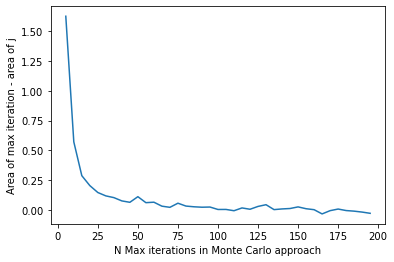

From the graph we deduce that the increase in accuracy of approximations at a max iteration
of more than 50 are generally not worth the processing time.


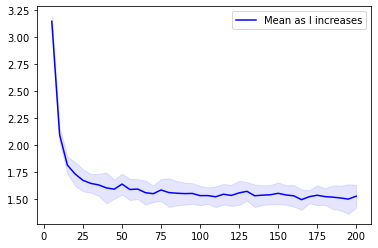

[0.07585374 0.07490334 0.07342098 0.09656972 0.08694619 0.07241381
 0.08478066 0.11624526 0.07271829 0.08022743 0.07959617 0.07451604
 0.08808513 0.06071203 0.08224597 0.10577712 0.08975968 0.08079752
 0.07575876 0.0691661  0.05961174 0.07439758 0.07533286 0.07633158
 0.08914595 0.06919277 0.08139846 0.07147307 0.07028969 0.07994367
 0.07102084 0.07784928 0.07176148 0.0468     0.07260434 0.05921106
 0.08470207 0.08798545 0.10524657 0.08187912]


In [27]:
#!!Adjusted

plt.plot(range(5, 200, 5), d)
plt.xlabel("N Max iterations in Monte Carlo approach")
plt.ylabel("Area of max iteration - area of j")
# plt.plot(45, d[9], 'ro', label='Best max')
# plt.legend()
plt.show()
print('''From the graph we deduce that the increase in accuracy of approximations at a max iteration
of more than 50 are generally not worth the processing time.''')

ci = [1.96*s[x]/m[x] for x in range(40)]

fig, ax = plt.subplots()
ax.plot(iteration_range, m, color='b', label='Mean as I increases')
ax.fill_between(iteration_range, (m-ci), (m+ci), color='b', alpha=0.1)

plt.legend()
plt.show()
print(s)

In [28]:
#!!ADJUSTED
def sample_convergence(n_tests, max_iteration, sample_range):
    ''' Calculates the difference in approximated between a range of sample sizes and its highest value.
    Returns a list of differences for sample size. The approximated area is the average over n_tests using
    the sample_size as the amount of samples.
    '''
    approximations = np.array([])
    standard_devs = np.array([])
    for samples in sample_range:
        print(samples)
        run = np.array([monte_carlo_area(samples, max_iteration, TOTAL_AREA) for r in range(n_tests)])
        avg = np.mean(run)
        std = np.std(run)
        approximations = np.append(approximations, avg)
        standard_devs = np.append(standard_devs, std)
    max_approximation = approximations[-1] # Final max_s = j 
    print('Approximations: ', approximations)
    differences = approximations[:-1] - max_approximation
    return differences, approximations, standard_devs

sample_range = [10**i for i in range(2, 6)]
dif, mean, std = sample_convergence(20, 50, sample_range)

100
1000
10000
100000
Approximations:  [1.47     1.5927   1.58955  1.588167]


In [29]:
monte_carlo_area(100000, 50, TOTAL_AREA)

1.5870000000000002

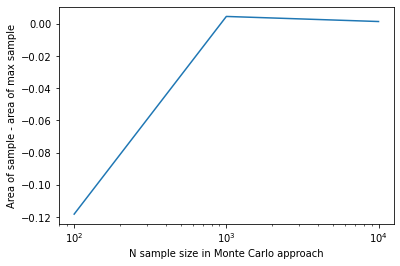

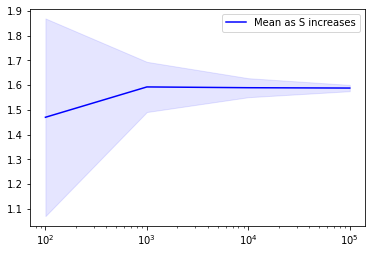

[0.07585374 0.07490334 0.07342098 0.09656972 0.08694619 0.07241381
 0.08478066 0.11624526 0.07271829 0.08022743 0.07959617 0.07451604
 0.08808513 0.06071203 0.08224597 0.10577712 0.08975968 0.08079752
 0.07575876 0.0691661  0.05961174 0.07439758 0.07533286 0.07633158
 0.08914595 0.06919277 0.08139846 0.07147307 0.07028969 0.07994367
 0.07102084 0.07784928 0.07176148 0.0468     0.07260434 0.05921106
 0.08470207 0.08798545 0.10524657 0.08187912]


In [30]:
#!!ADJUSTED
ci1 = [1.96*std[x]/mean[x] for x in range(4)]

plt.semilogx([10**i for i in range(2, 5)], dif)
plt.xlabel("N sample size in Monte Carlo approach")
plt.ylabel("Area of sample - area of max sample")
# plt.plot(45, d[9], 'ro', label='Best max')

fig, ax = plt.subplots()
ax.semilogx([10**i for i in range(2, 6)], mean, color='b', label='Mean as S increases')
ax.fill_between([10**i for i in range(2, 6)], (mean-ci1), (mean+ci1), color='b', alpha=0.1)
plt.legend()

plt.show()
print(s)

# Question 3

### Pure Random Sampling:
Everything from here on out is not synchronized between the 2 sets of code yet!!
TO DO: Comment on confidence intervals of hypercube and orthogonal: is variance lower? How sure are we that these methods could be better, i.e. are they more certain of their results?

In [31]:
#From previous analysis, we determined that 100 000 samples and 50 iterations
#is a nice balance between accuracy and performance. 

S = 100000
MAX_ITERATIONS = 50
NR_OF_TESTS = 30                      #How many times we want to run a simulation
TOTAL_AREA = 3*2                      #Area of the square


In [32]:
#Pure random sampling:
pr_area_sum = np.array([monte_carlo_area(S, MAX_ITERATIONS, TOTAL_AREA) for r in range(NR_OF_TESTS)])
pr_std = np.std(pr_area_sum)
pr_area = np.mean(pr_area_sum)

pr_ci = (1.96*pr_std)/pr_area

Area of Mandelbrot set using Pure Random =  1.589966


(1.55, 1.65)

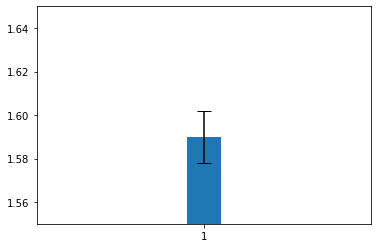

In [33]:
print('Area of Mandelbrot set using Pure Random = ', pr_area)
plt.bar(1, pr_area, width=0.2, yerr=pr_ci, capsize=7)
plt.xlim(0,2)
plt.xticks([1])
plt.ylim(1.55,1.65)

### Latin Hypercube Sampling:

In [34]:
LHS_x = np.linspace(-2, 1, 100000)
np.random.shuffle(LHS_x)
LHS_y = np.linspace(-1, 1, 100000)
np.random.shuffle(LHS_y)

LHS_samples = np.array([LHS_x, LHS_y]).T

def monte_carlo_LHS(samples, max_iterations, area):
    ''' Approximates the area of the mandelbrot set.
    The function generates samples and for each sample determines if it is in the mandelbrot set.
    The ratio of samples in the set can then be used to approximate its area.
    '''
    ratio = []
    for i in samples:
        x = mandelbrot_area(i[0], i[1], max_iterations)
        ratio.append(x)

    # Uses a mask to determine the ratio of hits by Boolean indexing.
    ones = np.ones(len(samples))
    ones = ones[ratio]
    total = np.sum(ones)
    # Proportion of True to False, multiplied by area of the sampled square.
    mandel_area = (total/len(samples)) * area
    return mandel_area

lhs_area_sum= np.array([monte_carlo_LHS(LHS_samples, 50, TOTAL_AREA) for r in range(NR_OF_TESTS)])


Area of Mandelbrot set using LHS =  1.5902999999999998
CI of LHS =  2.7366372738040707e-16
std of LHS =  2.220446049250313e-16


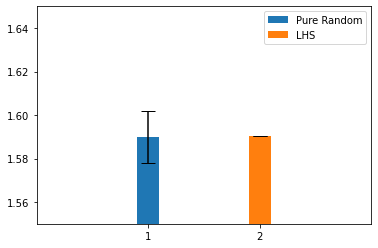

In [35]:
lhs_area = np.mean(lhs_area_sum)
lhs_std = np.std(lhs_area_sum)
lhs_ci = (1.96*lhs_std)/lhs_area

print('Area of Mandelbrot set using LHS = ', lhs_area)
print('CI of LHS = ', lhs_ci)
print('std of LHS = ', lhs_std)

plt.bar(1, pr_area, width=0.2, yerr=pr_ci, capsize=7, label='Pure Random')
plt.bar(2, lhs_area, width=0.2, yerr=lhs_ci, capsize=7, label='LHS')
plt.xlim(0,3)
plt.xticks([1, 2])
plt.ylim(1.55,1.65)
plt.legend()

plt.show()

### Orthogonal Sampling:

[ 27.  23.  28.  24.  21.  25.  26.  22.  30.  29.  62.  70.  68.  67.
  66.  63.  65.  69.  61.  64.   4.   1.   5.   9.   8.   3.   2.   6.
  10.   7.  16.  17.  11.  19.  20.  12.  14.  18.  15.  13.  78.  73.
  71.  80.  77.  75.  74.  72.  79.  76.  94.  98. 100.  95.  96.  93.
  92.  99.  91.  97.  36.  33.  38.  32.  40.  34.  31.  39.  35.  37.
  59.  57.  54.  56.  55.  58.  52.  51.  53.  60.  85.  81.  90.  88.
  89.  84.  82.  87.  83.  86.  50.  43.  44.  46.  45.  48.  49.  41.
  42.  47.]


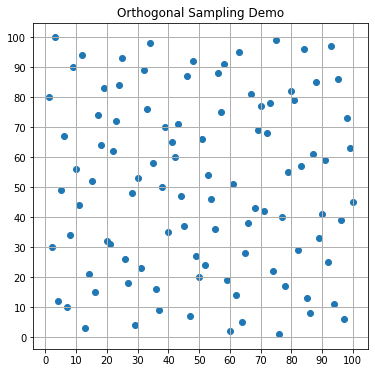

In [54]:
''' Implementation demo for orthogonal sampling:
'''
ortho_x = np.linspace(1, 100, 100)
ortho_x = ortho_x.reshape((10, 10))
np.random.shuffle(ortho_x)
for x in ortho_x:
    np.random.shuffle(x)
ortho_x = ortho_x.reshape(100)
print(ortho_x)
# Y coordinates are shuffled in blocks, and then shuffled in place.
ortho_y = np.linspace(1, 100, 100)
ortho_y = ortho_y.reshape((10, 10))
np.random.shuffle(ortho_y)
for y in ortho_y:
    np.random.shuffle(y)

# Pairwise matching of shuffled coordinates.
YOY = [y[i%10] for i in range(int(10)) for y in ortho_y]

plt.figure(figsize=(6, 6))
plt.scatter(ortho_x, YOY)
plt.xticks(list(range(0, 110, 10)))
plt.yticks(list(range(0, 110, 10)))
plt.grid(b=True, axis='both', linewidth=1)
plt.title("Orthogonal Sampling Demo")
plt.show()

In [37]:
SAMPLE_SIZE = 99225 # Instead of 100000 for a rounded square root.
ortho_x = np.linspace(-2, 1, SAMPLE_SIZE)
ortho_y = np.linspace(-1, 1, SAMPLE_SIZE)

sub_area_size = int(np.sqrt(SAMPLE_SIZE))

ortho_y = ortho_y.reshape((sub_area_size, sub_area_size))
np.random.shuffle(ortho_y)
for y in ortho_y:
    np.random.shuffle(y)
    
actual_ortho_y = [y[i%sub_area_size] for i in range(sub_area_size) 
                  for y in ortho_y]

ortho_samples = np.array([ortho_x, actual_ortho_y]).T

In [38]:
# LHS Function can be reused because only the sample method is different.
lhs_area_sum = np.array([monte_carlo_LHS(ortho_samples, 50, TOTAL_AREA) for r in range(NR_OF_TESTS)])
ortho_area = np.mean(lhs_area_sum)
print(ortho_area)

1.5911111111111111


Area of Mandelbrot set using Orthogonal Sampling =  1.5911111111111111
Std of Orthogonal Sampling =  0.0
CI of Orthogonal Sampling =  2.7366372738040707e-16


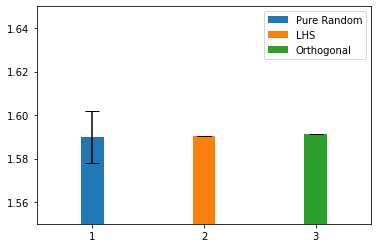

In [39]:
ortho_area = np.mean(lhs_area_sum)
ortho_std = np.std(lhs_area_sum)
ortho_ci = (1.96*lhs_std)/lhs_area

print('Area of Mandelbrot set using Orthogonal Sampling = ', ortho_area)
print('Std of Orthogonal Sampling = ', ortho_std)
print('CI of Orthogonal Sampling = ', ortho_ci)

plt.bar(1, pr_area, width=0.2, yerr=pr_ci, capsize=7, label='Pure Random')
plt.bar(2, lhs_area, width=0.2, yerr=lhs_ci, capsize=7, label='LHS')
plt.bar(3, ortho_area, width=0.2, yerr=ortho_ci, capsize=7, label='Orthogonal')
plt.xlim(0.5, 3.5)
plt.xticks([1, 2, 3])
plt.ylim(1.55,1.65)
plt.legend()

plt.show()

# Question 4

### To try and improve the convergence rate, we try to limit the numer of rejections in our accept reject method.
We think that this can be achieved by sampling from an area that is more in line with the area of the Mandelbrot set. From wikipedia, we found that the entire Mandelbrot set is enclosed by a closed disk with radius 2 from the origin. So by only looking at random samples that are drawn from within this circle, we can decreae the number of rejects with the same amount of samples drawn.

In [40]:
def make_samples_partitioned(N, xMin=-2, xMax=0.5, yMin=-1, yMax=1):
    ''' Returns an array of uniformly sampled N coordinates in a given range.
    '''
    samples = []
    area1 = 1.25*1
    area2 = 1.25*2
    total = area1+area2
    
    N_small = np.int((area1/total) * N)
    N_large = np.int((area2/total) * N)
   
    
    x_smaller = np.random.uniform(-2, -0.75, N_small) 
    y_smaller = np.random.uniform(-0.5, 0.5, N_small)
    #plt.scatter(x_smaller,y_smaller)
    
    x_larger = np.random.uniform(-0.75, 0.5, N_large) 
    y_larger = np.random.uniform(-1, 1, N_large) 
    #plt.scatter(x_larger,y_larger)
    
    samples1 = np.array([x_smaller, y_smaller])
    samples2 = np.array([x_larger, y_larger])
    
    samples = np.concatenate((samples1,samples2), 1)
    #Transpose, such that we can index on coordinate pairs easily
    return samples.T


make_samples_partitioned(100)
"""
fig, ax = plt.subplots()
circle = plt.Circle((0,0), radius=2, fill=False)
ax.add_artist(circle)
make_samples_circle(100)
plt.xlim(-3,3)
plt.ylim(-3,3)
"""

'\nfig, ax = plt.subplots()\ncircle = plt.Circle((0,0), radius=2, fill=False)\nax.add_artist(circle)\nmake_samples_circle(100)\nplt.xlim(-3,3)\nplt.ylim(-3,3)\n'

In [41]:
#Slightly Adjust our MC function to sample from our partitioned squares:
def monte_carlo_area_partitioned(sample_size, max_iterations, area):
    ''' Approximates the area of the mandelbrot set.
    The function generates samples and for each sample determines if it is in the mandelbrot set.
    The ratio of samples in the set can then be used to approximate its area.
    '''
    samples = make_samples_partitioned(sample_size)
    ratio = []
    for i in samples:
        x = mandelbrot_area(i[0], i[1], max_iterations)
        ratio.append(x)
    # Uses a mask to determine the ratio of hits by Boolean indexing.
    ones = np.ones(sample_size)
    ones = ones[ratio]
    total = np.sum(ones)
    # Proportion of True to False, multiplied by area of the sampled square.
    mandel_area = (total/sample_size) * area
    return mandel_area


In [42]:
#Constants for our function, same as before:
#From previous analysis, we determined that 100 000 samples and 50 iterations
#is a nice balance between accuracy and performance. 

S = 100000-1
MAX_ITERATIONS = 50
NR_OF_TESTS = 30                      #How many times we want to run a simulation
area1 = 1.25*1
area2 = 1.25*2
TOTAL_AREA_PARTITIONED = (area1+area2)  #Total area of our divided / partitioned shape
print(TOTAL_AREA_PARTITIONED)

# -2 - -3/4, -0.5 - +0.5
# -3/4 - 0.5, -1,1

3.75


In [43]:
#Pure random sampling: let's see what the convergence does now:
def sample_convergence_partitioned(n_tests, max_iteration, sample_range):
    ''' Calculates the difference in approximated between a range of sample sizes and its highest value.
    Returns a list of differences for sample size. The approximated area is the average over n_tests using
    the sample_size as the amount of samples.
    '''
    approximations = np.array([])
    standard_devs = np.array([])
    for samples in sample_range:
        print(samples)
        run = np.array([monte_carlo_area_partitioned(samples-1, max_iteration, TOTAL_AREA_PARTITIONED) for r in range(n_tests)])
        avg = np.mean(run)
        std = np.std(run)
        standard_devs = np.append(standard_devs, std)
        print(std)
        approximations = np.append(approximations, avg)
    
    max_approximation = approximations[-1] # Final max_s = j 
    print('Approximations: ', approximations)
    differences = approximations[:-1] - max_approximation
    return differences, approximations, standard_devs

sample_range = [10**i for i in range(2, 6)]
dif2, mean2, std2 = sample_convergence_partitioned(20, 50, sample_range)

100
0.1414634541545649
1000
0.07656093433832194
10000
0.015939579244653782
100000
0.005268674571309079
Approximations:  [1.59280303 1.61073574 1.5919592  1.59023715]


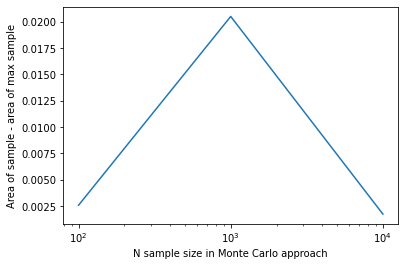

[0.00256588 0.02049858 0.00172204]


In [46]:
plt.semilogx([10**i for i in range(2, 5)], dif2)
plt.xlabel("N sample size in Monte Carlo approach")
plt.ylabel("Area of sample - area of max sample")
# plt.plot(45, d[9], 'ro', label='Best max')
# plt.legend()
plt.show()
print(dif2)

#### Convergence of Ai,s:
We need to investigate how the outcome of our simulation fluctuates as i or S increases, and that the estimate reaches a stable value. So we need to build confidence intervals around our estimates of the area for different levels of S. 

<function matplotlib.pyplot.show(*args, **kw)>

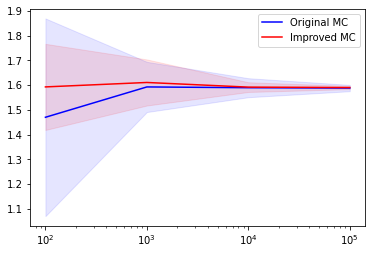

In [47]:
#Let's plot approximations with confidence interval:
x = np.linspace(2,6,1)
ci1 = [1.96*std[x]/mean[x] for x in range(4)]
ci2 = [1.96*std2[x]/mean2[x] for x in range(4)]

fig, ax = plt.subplots()
ax.semilogx([10**i for i in range(2, 6)], mean, color='b', label='Original MC')
ax.fill_between([10**i for i in range(2, 6)], (mean-ci1), (mean+ci1), color='b', alpha=0.1)

ax.semilogx([10**i for i in range(2, 6)], mean2, color='r', label='Improved MC')
ax.fill_between([10**i for i in range(2, 6)], (mean2-ci2), (mean2+ci2), color='r', alpha=0.1)

plt.legend()
plt.show